In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math
width=10
height=5
plt.rcParams['figure.figsize'] = [width, height]


# Eulerverfahren und Konsistenz

Beim Eulerverfahren legen wir zunächst ein Gitter $G=(x_0=a,x_1,\ldots,x_n=b)$ auf der x-Achse fest. Wir starten am Punkt $(a,y_0)$ und folgen der Tangente bis zum Punkt $(x_1,y_1)$.


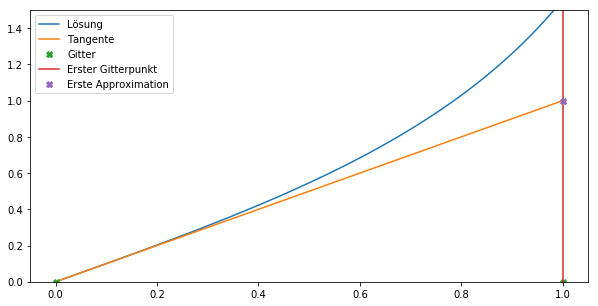

In [45]:
def f(x,y):
    return 1+y*y
def truesolution(x):
    return math.tan(x)
y0=0
a=0
b=1
N=2
N0=128

gitter=np.linspace(a,b,N)
X=np.linspace(a,b,N0)
lsg=[truesolution(w) for w in X]
tangente=[y0+(w-a)*f(a,y0) for w in X]
plt.plot(X,lsg)
plt.plot(X,tangente)
plt.plot(gitter,np.zeros(gitter.shape),'X')
plt.plot(gitter[1]*np.ones(N0),np.linspace(0,1.5,N0))
plt.plot(gitter[1],y0+(gitter[1]-a)*f(a,y0),'X')
plt.ylim([0,1.5])
plt.legend(['Lösung','Tangente','Gitter','Erster Gitterpunkt','Erste Approximation'])

Der Unterschied zwischen der echten Lösung und der Approximation am ersten Gitterpunkt heißt globaler Diskretisierungsfehler. Im ersten Schritt entsteht dieser Fehler dadurch, dass wir der Lösung nicht exakt folgen.

Wir machen nun das Gleiche für einem etwas feineren Gitter.

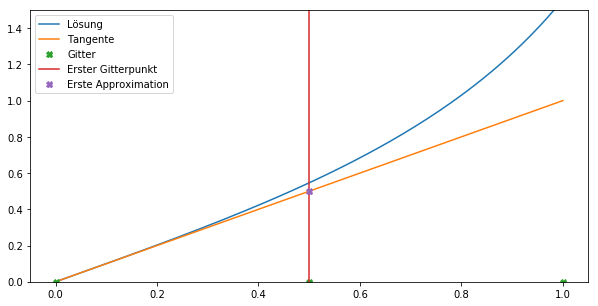

In [48]:
N=3
gitter=np.linspace(a,b,N)
X=np.linspace(a,b,N0)
lsg=[truesolution(w) for w in X]
tangente=[y0+(w-a)*f(a,y0) for w in X]
plt.plot(X,lsg)
plt.plot(X,tangente)
plt.plot(gitter,np.zeros(gitter.shape),'X')
plt.plot(gitter[1]*np.ones(N0),np.linspace(0,1.5,N0))
plt.plot(gitter[1],y0+(gitter[1]-a)*f(a,y0),'X')
plt.ylim([0,1.5])
plt.legend(['Lösung','Tangente','Gitter','Erster Gitterpunkt','Erste Approximation'])

Ausgehend vom Punkt $(x_1,y_1)$, folgen wir nun der Tangente in diesem Punkt.

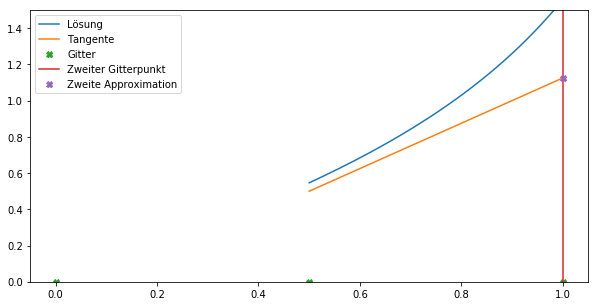

In [46]:
N=3
gitter=np.linspace(a,b,N)
y1=y0+(gitter[1]-a)*f(a,y0)
X=np.linspace(gitter[1],b,N0)
lsg=[truesolution(w) for w in X]
tangente=[y1+(w-gitter[1])*f(a,y1) for w in X]
plt.plot(X,lsg)
plt.plot(X,tangente)
plt.plot(gitter,np.zeros(gitter.shape),'X')
plt.plot(gitter[2]*np.ones(N0),np.linspace(0,1.5,N0))
plt.plot(gitter[2],y1+(gitter[2]-gitter[1])*f(a,y1),'X')
plt.ylim([0,1.5])
plt.legend(['Lösung','Tangente','Gitter','Zweiter Gitterpunkt','Zweite Approximation'])

Der globale Diskretisierungsfehler ist wieder die Differenz zwischen Kurve und Approximation. Wir bemerken: In diesem Fall ist nicht nur das Problem, dass wir nicht exakt der Kurve gefolgt sind, sondern wir sind auch noch ma falschen Punkt angefangen.

Wir betrachten daher die Lösung der Differentialgleichung, die durch den Punkt $(x_1,y_1)$ geht. Den Fehler, der dadurch entsteht, dass wir dieser Lösung nicht exakt folgen, nennen wir lokalen Diskretisierungsfehler.

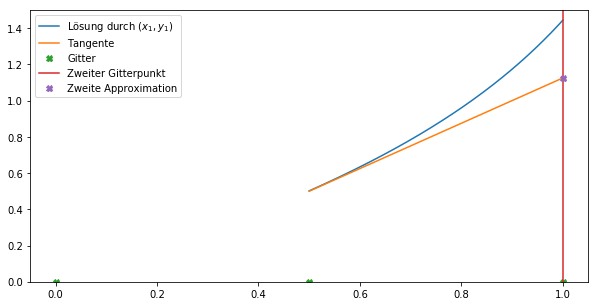

In [47]:
N=3
gitter=np.linspace(a,b,N)
y1=y0+(gitter[1]-a)*f(a,y0)
X=np.linspace(gitter[1],b,N0)
lsg=[truesolution(w-0.035) for w in X]
tangente=[y1+(w-gitter[1])*f(a,y1) for w in X]
plt.plot(X,lsg)
plt.plot(X,tangente)
plt.plot(gitter,np.zeros(gitter.shape),'X')
plt.plot(gitter[2]*np.ones(N0),np.linspace(0,1.5,N0))
plt.plot(gitter[2],y1+(gitter[2]-gitter[1])*f(a,y1),'X')
plt.ylim([0,1.5])
plt.legend(['Lösung durch $(x_1,y_1)$','Tangente','Gitter','Zweiter Gitterpunkt','Zweite Approximation'])

Der Unterschied zwischen dieser Lösung und der Approximation heißt lokaler Diskretisierungsfehler.